In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs
import re
iphone_reviews=[]

In [2]:
#Extracting reviews from Snapdeal website

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [3]:
#Removing repeated reviews
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
 with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear',
 'Very good product and delivered in time  as committed; true value for money',
 'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back',
 'offer product is available, customer care also good',
 'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also',
 'This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also',
 'They have sold this Iphone on interest free emi scheme. Even though the phone was available from other sellers at a cheaper price. But no interest part has been credited to my account till now. Snapdeal hasnt taken any action on this issue. Dont buy on fraudulent schemes.',
 'Features are good....but the phone gets heated after some time',
 'I bought iPhone 5C with best deal ever.  Product is qu

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [7]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear','Very good product and delivered in time as committed; true value for money','I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back','offer product is available,customer care also good','I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also','This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also','They have sold this Iphone on interest free emi scheme. Even though the phone was available from other sellers at a cheaper price. But no interest part has been credited to my account till now. Snapdeal hasnt taken any action on this issue. Dont buy on fraudulent schemes.','Features are good....but the phone gets heated after some time','I bought iPhone 5C with best deal ever. Product is quite good and I also updated it to latest iOS version.\nVery happy with the deal..',...,'IPhone 5c good product on good price. Within one day I got the product though in site specied 3 working days.','Really happy with the product and service..always the best..:)',"""Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.""",'awesum phone.good price good product.iphone is the best',"""It's really 100% worth to buy this product. I am fully satisfied with this product.""",'Good Product,Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\n\nApple is quality product. Only problem is you need to pay for everything.','got delivered on time and satisfactory product as always',"""It's been close to 5 months since I bought this product and till now","I am happy with how the product has performed.""]"


In [8]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear\'  \'Very good product and delivered in time  as committed; true value for money\'  \'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back\'  \'offer product is available  customer care also good\'  \'I got my iPhone 5c white colour in good condition and best rate \\nsnapdeal rate is always lowest then other sites and store also\'  \'This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also\'  \'They have sold this Iphone on interest free emi scheme. Even though the phone was available from other sellers at a cheaper price. But no interest part has been credited to my account till now. Snapdeal hasnt taken any action on this issue. Dont buy on fraudulent schemes.\'  \'Features are good....but the phone gets heated after some time\'  \'I bought iPhone 5C with best deal ever.  Pr

In [9]:
#Removing Punctuations
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I M Happy With iphone5c and snapdeal services i would recommended Snapdeal service my near  dear  Very good product and delivered in time  as committed true value for money  I have got ths phone in perfect condition and thank you snapdeal for perfect eliveryi guess ur are earning the trust back  offer product is available  customer care also good  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  This product is awwsum in use As by looks also I would defination prefer this nxt time also  They have sold this Iphone on interest free emi scheme Even though the phone was available from other sellers at a cheaper price But no interest part has been credited to my account till now Snapdeal hasnt taken any action on this issue Dont buy on fraudulent schemes  Features are goodbut the phone gets heated after some time  I bought iPhone 5C with best deal ever  Product is quite good and I also updated it to latest iOS 

In [10]:
#Removing https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I M Happy With iphone5c and snapdeal services i would recommended Snapdeal service my near  dear  Very good product and delivered in time  as committed true value for money  I have got ths phone in perfect condition and thank you snapdeal for perfect eliveryi guess ur are earning the trust back  offer product is available  customer care also good  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  This product is awwsum in use As by looks also I would defination prefer this nxt time also  They have sold this Iphone on interest free emi scheme Even though the phone was available from other sellers at a cheaper price But no interest part has been credited to my account till now Snapdeal hasnt taken any action on this issue Dont buy on fraudulent schemes  Features are goodbut the phone gets heated after some time  I bought iPhone 5C with best deal ever  Product is quite good and I also updated it to latest iOS 

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', 'M', 'Happy', 'With', 'iphone5c', 'and', 'snapdeal', 'services', 'i', 'would', 'recommended', 'Snapdeal', 'service', 'my', 'near', 'dear', 'Very', 'good', 'product', 'and', 'delivered', 'in', 'time', 'as', 'committed', 'true', 'value', 'for', 'money', 'I', 'have', 'got', 'ths', 'phone', 'in', 'perfect', 'condition', 'and', 'thank', 'you', 'snapdeal', 'for', 'perfect', 'eliveryi', 'guess', 'ur', 'are', 'earning', 'the', 'trust', 'back', 'offer', 'product', 'is', 'available', 'customer', 'care', 'also', 'good', 'I', 'got', 'my', 'iPhone', '5c', 'white', 'colour', 'in', 'good', 'condition', 'and', 'best', 'rate', 'nsnapdeal', 'rate', 'is', 'always', 'lowest', 'then', 'other', 'sites', 'and', 'store', 'also', 'This', 'product', 'is', 'awwsum', 'in', 'use', 'As', 'by', 'looks', 'also', 'I', 'would', 'defination', 'prefer', 'this', 'nxt', 'time', 'also', 'They', 'have', 'sold', 'this', 'Iphone', 'on', 'interest', 'free', 'emi', 'scheme', 'Even', 'though', 'the', 'phone', 'was', 'availa

In [13]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#Tokens count
len(text_tokens)

1573

In [15]:
#Removing Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['M', 'Happy', 'With', 'iphone5c', 'snapdeal', 'services', 'would', 'recommended', 'Snapdeal', 'service', 'near', 'dear', 'Very', 'good', 'product', 'delivered', 'time', 'committed', 'true', 'value', 'money', 'got', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earning', 'trust', 'back', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'got', 'iPhone', '5c', 'white', 'colour', 'good', 'condition', 'best', 'rate', 'nsnapdeal', 'rate', 'always', 'lowest', 'sites', 'store', 'also', 'This', 'product', 'awwsum', 'use', 'As', 'looks', 'also', 'would', 'defination', 'prefer', 'nxt', 'time', 'also', 'They', 'sold', 'Iphone', 'interest', 'free', 'emi', 'scheme', 'Even', 'though', 'phone', 'available', 'sellers', 'cheaper', 'price', 'But', 'interest', 'part', 'credited', 'account', 'till', 'Snapdeal', 'hasnt', 'taken', 'action', 'issue', 'Dont', 'buy', 'fraudulent', 'schemes', 'Features', 'goodbut', 'phone', 'gets', 'heate

In [16]:
#Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['features', 'goodbut', 'phone', 'gets', 'heated', 'time', 'bought', 'iphone', '5c', 'best', 'deal', 'ever', 'product', 'quite', 'good', 'also', 'updated', 'latest', 'ios', 'versionnvery', 'happy', 'deal', 'price', 'delivery', 'service', 'good', 'received', 'order', 'time', 'bought', 'dear', 'wife', 'surprise', 'got', 'delivered', 'time', 'dream', 'come', 'true', 'bought', 'iphone', '5c', 'snapdeal', 'product', 'absolutly', 'real', 'wors', 'properly', 'price', 'also', 'low', 'online', 'shoping', 'sides', 'thnxx', 'snapdeal', 'adorable', 'phone', 'top', 'class', 'service', 'ð\x9f\x98\x98', 'good', 'mobile', 'memory', 'filled', 'faster', '8gb', 'limit', 'the', 'product', 'supplied', 'snapdeal', 'good', 'best', 'price', 'it', 'shown', 'it', 'nice', 'phone', 'apple', 'camera', 'good', 'phone', 'works', 'perfectly', 'it', 'worth', 'shot', 'lacks', 'feel', 'the', 'piece', 'delivered', 'good', 'conditions', 'received', 'discount', '1000rs']


In [17]:
#Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['featur', 'goodbut', 'phone', 'get', 'heat', 'time', 'bought', 'iphon', '5c', 'best', 'deal', 'ever', 'product', 'quit', 'good', 'also', 'updat', 'latest', 'io', 'versionnveri', 'happi', 'deal', 'price', 'deliveri', 'servic', 'good', 'receiv', 'order', 'time', 'bought', 'dear', 'wife', 'surpris', 'got', 'deliv', 'time', 'dream', 'come', 'true', 'bought', 'iphon', '5c', 'snapdeal', 'product', 'absolutli', 'real', 'wor', 'properli', 'price', 'also', 'low', 'onlin', 'shope', 'side', 'thnxx', 'snapdeal', 'ador', 'phone', 'top', 'class', 'servic', 'ð\x9f\x98\x98', 'good', 'mobil', 'memori', 'fill', 'faster', '8gb', 'limit', 'the', 'product', 'suppli', 'snapdeal', 'good', 'best', 'price', 'it', 'shown', 'it', 'nice', 'phone', 'appl', 'camera', 'good', 'phone', 'work', 'perfectli', 'it', 'worth', 'shot', 'lack', 'feel', 'the', 'piec', 'deliv', 'good', 'condit', 'receiv', 'discount', '1000r']


In [18]:
!pip3 install en_core_web_sm
!python -m spacy download %


✘ No compatible package found for '%' (spaCy v3.7.4)



In [19]:
#Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

m happy with iphone5c snapdeal services would recommended snapdeal service near dear very good product delivered time committed true value money got ths phone perfect condition thank snapdeal perfect eliveryi guess ur earning trust back offer product available customer care also good got iphone 5c white colour good condition best rate nsnapdeal rate always lowest sites store also this product awwsum use as looks also would defination prefer nxt time also they sold iphone interest free emi scheme even though phone available sellers cheaper price but interest part credited account till snapdeal hasnt taken action issue dont buy fraudulent schemes features goodbut phone gets heated time bought iphone 5c best deal ever product quite good also updated latest ios versionnvery happy deal price delivery service good received order time bought dear wife surprise got delivered time dream come true bought iphone 5c snapdeal product absolutly real wors properly price also low online shoping sides 

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['m', 'happy', 'with', 'iphone5c', 'snapdeal', 'service', 'would', 'recommend', 'snapdeal', 'service', 'near', 'dear', 'very', 'good', 'product', 'deliver', 'time', 'commit', 'true', 'value', 'money', 'get', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'back', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'get', 'iphone', '5c', 'white', 'colour', 'good', 'condition', 'good', 'rate', 'nsnapdeal', 'rate', 'always', 'low', 'site', 'store', 'also', 'this', 'product', 'awwsum', 'use', 'as', 'look', 'also', 'would', 'defination', 'prefer', 'nxt', 'time', 'also', 'they', 'sell', 'iphone', 'interest', 'free', 'emi', 'scheme', 'even', 'though', 'phone', 'available', 'seller', 'cheap', 'price', 'but', 'interest', 'part', 'credit', 'account', 'till', 'snapdeal', 'have', 'not', 'take', 'action', 'issue', 'do', 'not', 'buy', 'fraudulent', 'scheme', 'feature', 'goodbut', 'phone', 'get', 'heated', 'time', 'b

In [21]:
clean_comments=' '.join(lemmas)
clean_comments

'm happy with iphone5c snapdeal service would recommend snapdeal service near dear very good product deliver time commit true value money get ths phone perfect condition thank snapdeal perfect eliveryi guess ur earn trust back offer product available customer care also good get iphone 5c white colour good condition good rate nsnapdeal rate always low site store also this product awwsum use as look also would defination prefer nxt time also they sell iphone interest free emi scheme even though phone available seller cheap price but interest part credit account till snapdeal have not take action issue do not buy fraudulent scheme feature goodbut phone get heated time buy iphone 5c good deal ever product quite good also update late ios versionnvery happy deal price delivery service good receive order time buy dear wife surprise get deliver time dream come true buy iphone 5c snapdeal product absolutly real wor properly price also low online shop side thnxx snapdeal adorable phone top class

In [22]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'happy': 151, 'with': 398, 'iphone5c': 173, 'snapdeal': 332, 'service': 310, 'would': 406, 'recommend': 290, 'near': 215, 'dear': 92, 'very': 390, 'good': 143, 'product': 263, 'deliver': 95, 'time': 367, 'commit': 69, 'true': 376, 'value': 388, 'money': 207, 'get': 140, 'ths': 364, 'phone': 244, 'perfect': 240, 'condition': 73, 'thank': 353, 'eliveryi': 112, 'guess': 148, 'ur': 384, 'earn': 110, 'trust': 378, 'back': 37, 'offer': 225, 'available': 32, 'customer': 85, 'care': 58, 'also': 21, 'iphone': 172, '5c': 7, 'white': 396, 'colour': 67, 'rate': 282, 'nsnapdeal': 223, 'always': 22, 'low': 194, 'site': 326, 'store': 343, 'this': 361, 'awwsum': 36, 'use': 385, 'as': 30, 'look': 191, 'defination': 94, 'prefer': 251, 'nxt': 224, 'they': 358, 'sell': 308, 'interest': 168, 'free': 135, 'emi': 113, 'scheme': 304, 'even': 115, 'though': 363, 'seller': 309, 'cheap': 62, 'price': 255, 'but': 53, 'part': 237, 'credit': 83, 'account': 13, 'till': 366, 'have': 153, 'not': 222, 'take': 350, 'ac

In [25]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(clean_commentscv.toarray().shape)

(1028, 410)


In [27]:
#CountVectorizer with N-grams (Bigrams & Trigrams)
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [28]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [31]:
print(tfidf_matix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


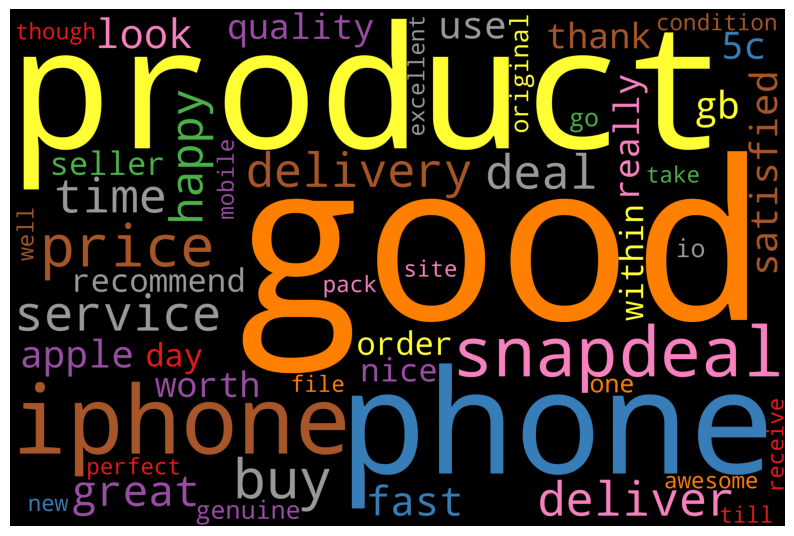

In [33]:
#Define a function to plot Word Cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10,15))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

In [34]:
#Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [35]:
for token in doc_block[100:200]:
    print(token,token.pos_)

fraudulent ADJ
scheme NOUN
feature NOUN
goodbut ADJ
phone NOUN
get NOUN
heated VERB
time NOUN
buy VERB
iphone PROPN
5c NUM
good ADJ
deal NOUN
ever ADV
product NOUN
quite ADV
good ADJ
also ADV
update VERB
late ADJ
ios NOUN
versionnvery PROPN
happy ADJ
deal NOUN
price NOUN
delivery NOUN
service NOUN
good NOUN
receive VERB
order NOUN
time NOUN
buy VERB
dear ADJ
wife NOUN
surprise NOUN
get VERB
deliver VERB
time NOUN
dream NOUN
come VERB
true ADJ
buy VERB
iphone NOUN
5c PROPN
snapdeal ADJ
product NOUN
absolutly ADV
real ADJ
wor NOUN
properly ADV
price NOUN
also ADV
low ADJ
online ADJ
shop NOUN
side NOUN
thnxx ADJ
snapdeal ADJ
adorable ADJ
phone NOUN
top ADJ
class NOUN
service NOUN
ð NOUN
good ADJ
mobile NOUN
memory NOUN
fill NOUN
fast ADV
8 NUM
gb NOUN
limit NOUN
the DET
product NOUN
supply NOUN
snapdeal ADV
good ADJ
good ADJ
price NOUN
it PRON
show VERB
it PRON
nice ADJ
phone NOUN
apple NOUN
camera NOUN
good ADJ
phone NOUN
work NOUN
perfectly ADV
it PRON
worth ADJ
shot NOUN
lack NOUN
f

In [36]:
#Filtering nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['supply', 'price', 'show', 'phone', 'apple', 'camera', 'phone', 'work', 'shot', 'lack', 'feel', 'piece', 'deliver', 'condition', 'receive', 'discount', '1000rs', 'charge', 'coupon', 'deliver', 'day', 'commit', 'delivery', 'nall', 'thing', 'need', 'buy', 'year', 'snapdeal', 'perfect', 'lagging', 'business', 'need', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience', 'picture', 'quality', 'sound', 'hear', 'ad', 'look', 'feel', 'n', 'ncon', 'transfer', 'file', 'use', 'andriodblackberrywindow', 'iphone', 'use', 'file', 'transfer', 'app', 'shareitnnother', 'iphone', 'itnniphone', 'time', 'delivery', 'star', 'd', 'phone', 'good', 'd', 'phone', 'look', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone', 'problem', 'choose', 'gb', 'phone']


In [37]:
#Counting noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,40
1,phone,28
2,iphone,26
3,price,17
4,buy,15
5,service,12
6,deliver,11
7,time,11
8,deal,11
9,delivery,11


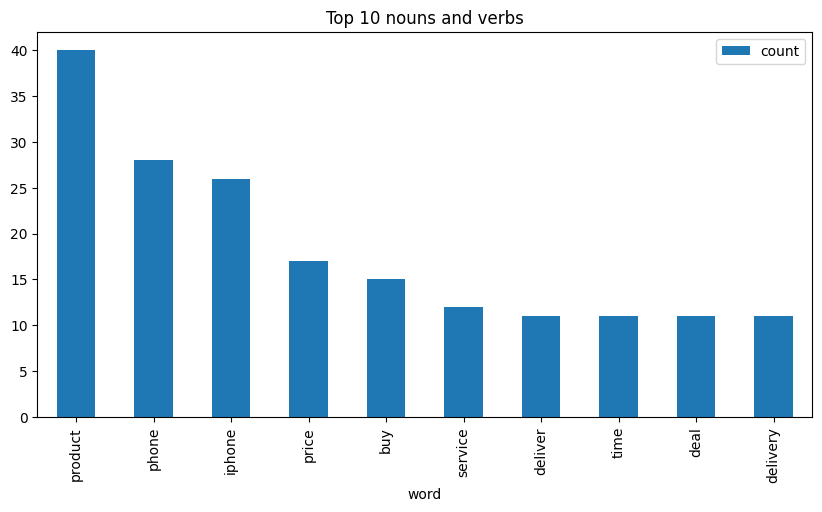

In [40]:
#Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(10,5),title='Top 10 nouns and verbs');

In [42]:
#Emotion Mining - Sentiment Analysis
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(ip_snapd))
sentences

["[ ' I   M   H a p p y   W i t h   i p h o n e 5 c   a n d   s n a p d e a l   s e r v i c e s .",
 "i   w o u l d   r e c o m m e n d e d   S n a p d e a l   s e r v i c e   m y   n e a r   &   d e a r '     ' V e r y   g o o d   p r o d u c t   a n d   d e l i v e r e d   i n   t i m e     a s   c o m m i t t e d ;   t r u e   v a l u e   f o r   m o n e y '     ' I   h a v e   g o t   t h s   p h o n e   i n   p e r f e c t   c o n d i t i o n   a n d   t h a n k   y o u   s n a p d e a l   f o r   p e r f e c t   e l i v e r y .",
 "i   g u e s s   u r   a r e   e a r n i n g   t h e   t r u s t   b a c k '     ' o f f e r   p r o d u c t   i s   a v a i l a b l e     c u s t o m e r   c a r e   a l s o   g o o d '     ' I   g o t   m y   i P h o n e   5 c   w h i t e   c o l o u r   i n   g o o d   c o n d i t i o n   a n d   b e s t   r a t e   \\ n s n a p d e a l   r a t e   i s   a l w a y s   l o w e s t   t h e n   o t h e r   s i t e s   a n d   s t o r e   a l s o '     '

In [43]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,[ ' I M H a p p y W i t h i p h o n e ...
1,i w o u l d r e c o m m e n d e d S n a ...
2,i g u e s s u r a r e e a r n i n g ...
3,.
4,.
...,...
199,U s e d G r a n d Q a u t t r o w h i c ...
200,\ n \ n A p p l e i s q u a l i t y p r ...
201,O n l y p r o b l e m i s y o u n e e ...
202,' g o t d e l i v e r e d o n t i m e ...


In [44]:
#Emotion Lexicon - Affin
affin=pd.read_csv('https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [45]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [46]:
#Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [47]:
#Manual testing
calculate_sentiment(text='great')

3

In [48]:
#Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      0
3      0
4      0
      ..
199    0
200    0
201    0
202    0
203    0
Name: sentiment_value, Length: 204, dtype: int64

In [49]:
#how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       41
1      180
2      209
3        1
4        1
      ... 
199     64
200     26
201     40
202    145
203      1
Name: word_count, Length: 204, dtype: int64

In [50]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
0,[ ' I M H a p p y W i t h i p h o n e ...,0,41
130,T i m e l y d e l i v e r y b y s n a p ...,0,63
131,R e c o m m e n d i n g t o e v e r y o n ...,0,100
132,O r i g i n a l A p p l e P r o d u c t ...,0,40
133,\ n A n d i P h o n e i s i P h o n e ...,0,70
...,...,...,...
71,E v e r u s e d .,0,9
72,.,0,1
73,.,0,1
63,I h v c h o s e n d 8 g b p h o n e ...,0,31


In [51]:
#Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    204.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: sentiment_value, dtype: float64

In [52]:
#Negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,[ ' I M H a p p y W i t h i p h o n e ...,0,41
1,i w o u l d r e c o m m e n d e d S n a ...,0,180
2,i g u e s s u r a r e e a r n i n g ...,0,209
3,.,0,1
4,.,0,1
...,...,...,...
199,U s e d G r a n d Q a u t t r o w h i c ...,0,64
200,\ n \ n A p p l e i s q u a l i t y p r ...,0,26
201,O n l y p r o b l e m i s y o u n e e ...,0,40
202,' g o t d e l i v e r e d o n t i m e ...,0,145


In [53]:
#Positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count


In [54]:
#Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,[ ' I M H a p p y W i t h i p h o n e ...,0,41,0
1,i w o u l d r e c o m m e n d e d S n a ...,0,180,1
2,i g u e s s u r a r e e a r n i n g ...,0,209,2
3,.,0,1,3
4,.,0,1,4
...,...,...,...,...
199,U s e d G r a n d Q a u t t r o w h i c ...,0,64,199
200,\ n \ n A p p l e i s q u a l i t y p r ...,0,26,200
201,O n l y p r o b l e m i s y o u n e e ...,0,40,201
202,' g o t d e l i v e r e d o n t i m e ...,0,145,202


<ipython-input-55-cc66e3b0c03f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='sentiment_value', ylabel='Density'>

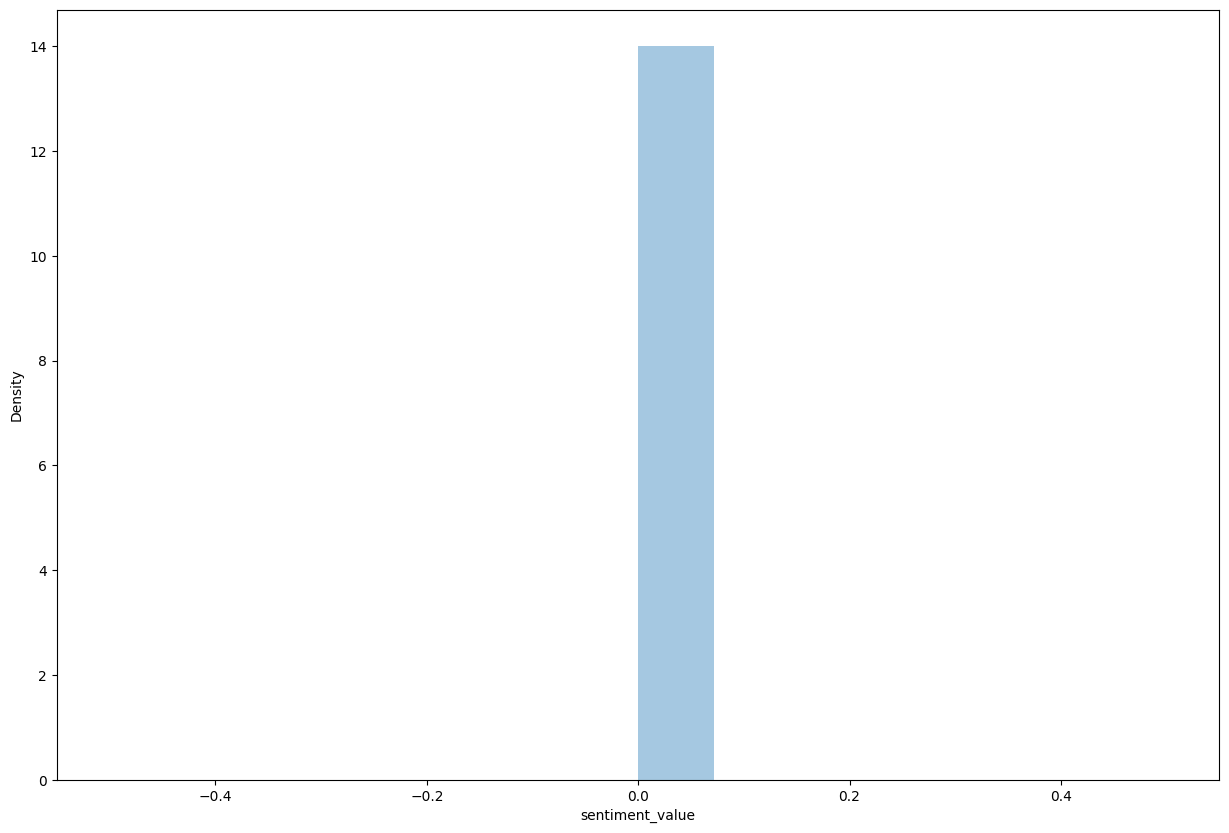

In [55]:
#Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

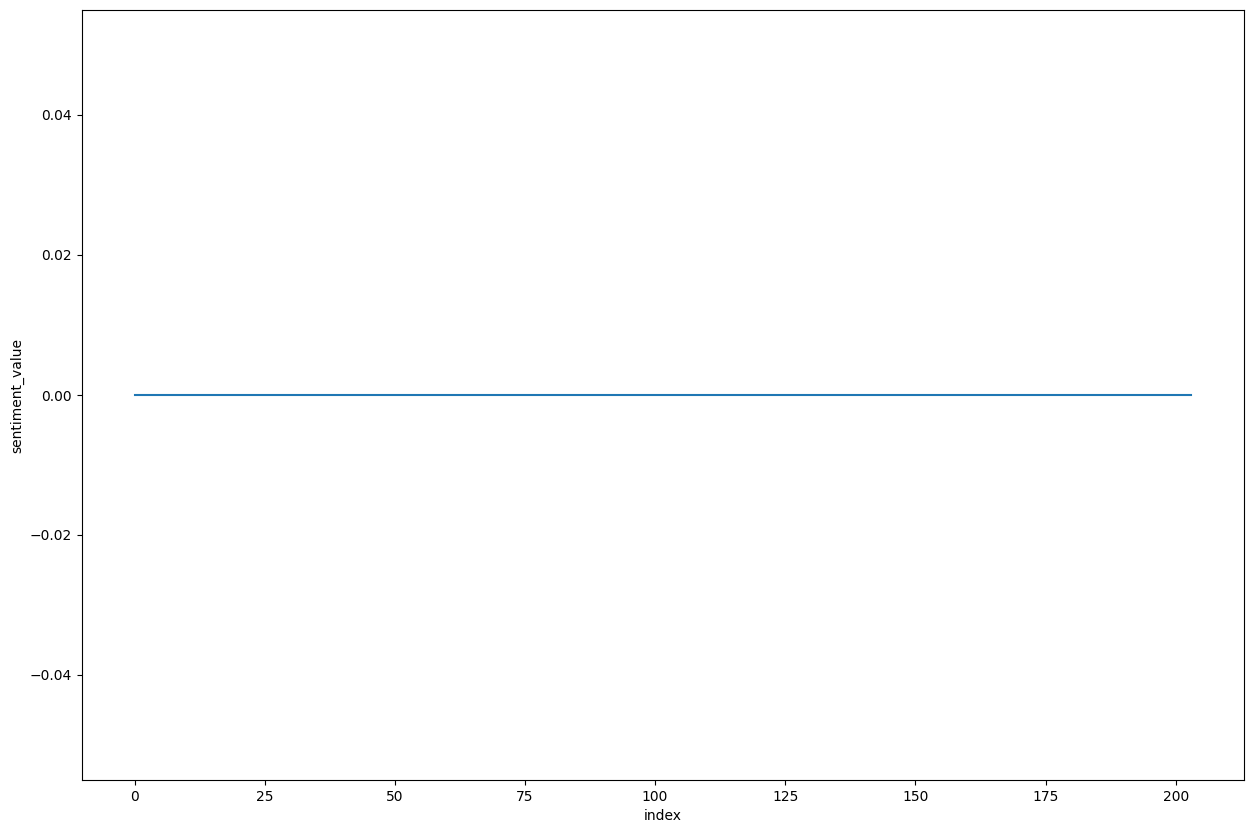

In [56]:
#Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

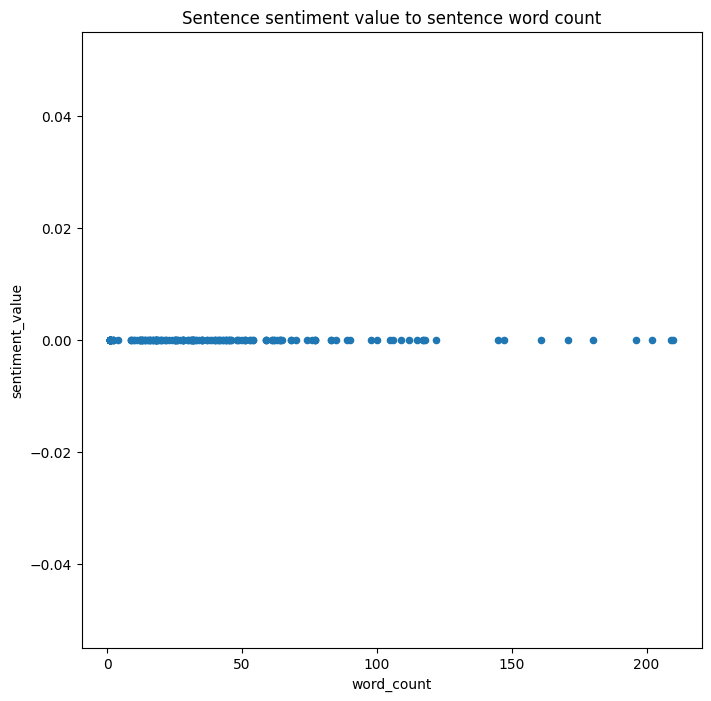

In [57]:
#Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')